In [74]:
import pandas as pd
import numpy as np
import datetime

## Question:1
### a.

In [75]:
# import dataset 

forward = pd.read_excel('forwardSector.xlsx')
forward.head()

,Date,S5MATR Index (R1),S5ENRS Index (R2),S4RLST Index (L1),S5FINL Index (R1),S5INDU Index (R1),S5TELS Index (R1),S5UTIL Index (R1),S5COND Index (L1),S5CONS Index (R1),S5HLTH Index (R1),S5INFT Index (L1),SPX Index (R1)
0,2023-01-31,17.9081,10.7430,32.2286,13.3426,19.1048,15.5487,18.0203,22.8799,20.3698,17.3003,22.6707,18.1990
1,2023-01-27,17.5719,10.9352,31.7015,13.2034,18.9574,15.6275,18.0010,22.8657,20.1476,17.1977,22.7657,18.1617
2,2023-01-20,17.1242,10.6727,30.3745,12.8771,18.3096,14.9715,18.0841,21.3794,20.1048,17.2956,21.5423,17.5797
3,2023-01-13,17.3470,10.5296,29.7772,13.0073,18.8523,14.5053,18.6572,21.3390,20.7692,17.3790,21.4114,17.6258
4,2023-01-06,16.5958,10.1140,28.1291,12.7110,18.7490,13.9931,18.5873,19.9729,21.1234,17.3654,20.4468,17.1330


In [76]:
forward.set_index('Date', inplace=True)

In [77]:
# selecting energy sector 

energy = forward[['S5ENRS Index  (R2)']]

# Extract a single column and date index into a new DataFrame
energy.index = pd.to_datetime(forward.index)

In [78]:
energy

,S5ENRS Index (R2)
Date,
2023-01-31,10.7430
2023-01-27,10.9352
2023-01-20,10.6727
2023-01-13,10.5296
2023-01-06,10.1140
...,...
1991-02-22,12.8942
1991-02-15,12.9320
1991-02-08,12.9943


Text(0, 0.5, 'forward PE of energy sector')

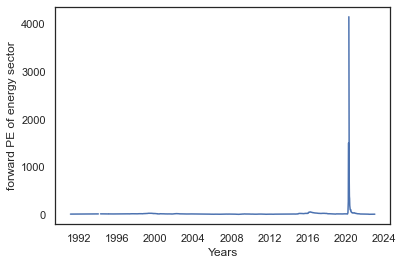

In [79]:
# visualize PE series 
import matplotlib.pyplot as plt

plt.plot(energy[['S5ENRS Index  (R2)']])
plt.xlabel('Years')
plt.ylabel('forward PE of energy sector')

In [80]:
# use XLE energy ETF 
xle = pd.read_csv('XLE-2.csv')
xle.set_index('Date', inplace=True)


xle_price = xle[['Close']]

# Extract a single column and date index into a new DataFrame
xle_price.index = pd.to_datetime(xle.index)

In [81]:
xle_price

,Close
Date,
1998-12-23,23.750000
1998-12-24,23.625000
1998-12-28,23.500000
1998-12-29,23.734375
1998-12-30,23.375000
...,...
2023-02-24,84.660004
2023-02-27,84.910004
2023-02-28,83.690002


Text(0, 0.5, 'price of energy ETF')

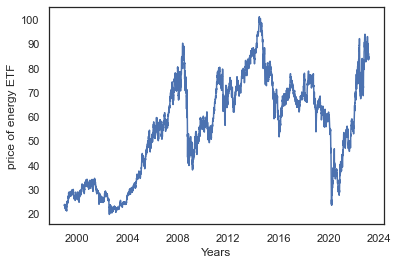

In [82]:
# visualize this price series 

plt.plot(xle_price[['Close']])
plt.xlabel('Years')
plt.ylabel('price of energy ETF')

In [83]:
# merge two datasets 

# sort left dataframe by index
energy = energy.sort_index()

energy_xle = pd.merge_asof(energy, xle_price,left_index = True, right_index = True)
energy_xle["returns"] = np.log(energy_xle["Close"]).diff()
energy_xle = energy_xle.dropna()

energy_xle

,S5ENRS Index (R2),Close,returns
Date,,,
1999-01-01,24.8916,23.343750,-0.011976
1999-01-08,25.2982,23.968750,0.026422
1999-01-15,24.0740,22.718750,-0.053560
1999-01-22,24.3329,22.593750,-0.005517
1999-01-29,24.3994,21.812500,-0.035190
...,...,...,...
2023-01-06,10.1140,87.559998,0.001028
2023-01-13,10.5296,89.949997,0.026930
2023-01-20,10.6727,90.480003,0.005875


In [84]:
# Split the DataFrame into a training set and a validation set

# Calculate the split index
split_index = int(0.8 * len(energy_xle))

# Split the DataFrame into a training set and a validation set
train_df = energy_xle[:split_index]
val_df = energy_xle[split_index:]
train_df

,S5ENRS Index (R2),Close,returns
Date,,,
1999-01-01,24.8916,23.343750,-0.011976
1999-01-08,25.2982,23.968750,0.026422
1999-01-15,24.0740,22.718750,-0.053560
1999-01-22,24.3329,22.593750,-0.005517
1999-01-29,24.3994,21.812500,-0.035190
...,...,...,...
2018-03-23,19.0941,66.769997,-0.008055
2018-03-30,19.2302,67.410004,0.009540
2018-04-06,19.1522,67.349998,-0.000891


### b.

In [85]:
energy_xle.columns

Index(['S5ENRS Index  (R2)', 'Close', 'returns'], dtype='object')

In [86]:
# specify candidate values for hyperparameters

ks = np.linspace(.01, .99, 10)
zs = np.linspace(.01, 3, 10)
ws = np.arange(5, 30, 5)
hs = 5. # one week

In [87]:
import itertools as it
# build a grid with all possible hyperparameters
grid = np.array(np.meshgrid(ks,zs, ws, hs)).T.reshape(-1,4)

grid

array([[1.00000000e-02, 1.00000000e-02, 5.00000000e+00, 5.00000000e+00],
       [1.00000000e-02, 3.42222222e-01, 5.00000000e+00, 5.00000000e+00],
       [1.00000000e-02, 6.74444444e-01, 5.00000000e+00, 5.00000000e+00],
       ...,
       [9.90000000e-01, 2.33555556e+00, 2.50000000e+01, 5.00000000e+00],
       [9.90000000e-01, 2.66777778e+00, 2.50000000e+01, 5.00000000e+00],
       [9.90000000e-01, 3.00000000e+00, 2.50000000e+01, 5.00000000e+00]])

In [88]:
energy_xle1 = train_df.copy()

In [18]:
storage = pd.DataFrame(columns = ["k", "z", "w", "h", "profits"])
for n in range(len(grid)):
    # Each loop we pull out the values for a new set of hyperparamters from the grid
    k,z,w,h= grid[n]
    
    # We fit a filter and CI using the next set of parameters


    energy_xle1["Filter"] = energy_xle1['S5ENRS Index  (R2)'].ewm(alpha = k, adjust = False).mean()
    energy_xle1["Filter Error"] = energy_xle1['S5ENRS Index  (R2)'] -energy_xle1["Filter"]
    energy_xle1["std"] = energy_xle1["Filter Error"].rolling(int(w)).std()
    energy_xle1["Upper"] = energy_xle1["Filter"] + z*energy_xle1["std"]
    energy_xle1["Lower"] = energy_xle1["Filter"] - z*energy_xle1["std"]
    energy_xle1["test"] = np.where(energy_xle1["Filter Error"].abs()>z*energy_xle1["std"], 1, 0)*np.sign(energy_xle1["Filter Error"])
    
    # create vectors where we can store information on signals and when the change is first signalled
    energy_xle1["test2"] = 0
    energy_xle1["signal"] = 0
    
    for j in energy_xle1.index:
        # if there is a change in the signal, we want to take a position for teh next h periods
        if (energy_xle1.loc[j, "test"] == 1) &  (energy_xle1.shift().loc[j, "test"] != 1):
            energy_xle1.loc[j:j+datetime.timedelta(h), "signal"] = 1
            energy_xle1.loc[j, "test2"] = 1
        elif (energy_xle1.loc[j, "test"] == -1) &  (energy_xle1.shift().loc[j, "test"] != -1):
            energy_xle1.loc[j:j+datetime.timedelta(h), "signal"] =  -1
            energy_xle1.loc[j, "test2"] = -1
    
    # calculate metric
    energy_xle1["cumulative_returns"] = np.exp((energy_xle1["signal"].shift()*energy_xle1.returns).cumsum())-1
    
    # store the results
    storage = storage.append({"k":k, "z":z, "w":w, "h":h,
                "profits":energy_xle1["cumulative_returns"][-1]}, ignore_index = True)
    # print so I can track progress of loop (can take a few minutes)
    print(n)

C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


0


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


1


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


2


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


3


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


4


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


5


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


6


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


7


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


8


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


9


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


10


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


11


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


12


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


13


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


14


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


15


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


16


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


17


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


18


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


19


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


20


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


21


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


22


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


23


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


24


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


25


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


26


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


27


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


28


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


29


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


30


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


31


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


32


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


33


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


34


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


35


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


36


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


37


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


38


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


39


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


40


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


41


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


42


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


43


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


44


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


45


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


46


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


47


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


48


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


49


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


50


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


51


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


52


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


53


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


54


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


55


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


56


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


57


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


58


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


59


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


60


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


61


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


62


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


63


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


64


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


65


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


66


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


67


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


68


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


69


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


70


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


71


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


72


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


73


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


74


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


75


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


76


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


77


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


78


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


79


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


80


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


81


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


82


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


83


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


84


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


85


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


86


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


87


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


88


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


89


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


90


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


91


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


92


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


93


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


94


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


95


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


96


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


97


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


98


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


99


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


100


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


101


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


102


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


103


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


104


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


105


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


106


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


107


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


108


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


109


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


110


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


111


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


112


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


113


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


114


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


115


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


116


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


117


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


118


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


119


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


120


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


121


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


122


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


123


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


124


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


125


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


126


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


127


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


128


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


129


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


130


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


131


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


132


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


133


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


134


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


135


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


136


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


137


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


138


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


139


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


140


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


141


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


142


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


143


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


144


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


145


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


146


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


147


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


148


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


149


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


150


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


151


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


152


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


153


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


154


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


155


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


156


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


157


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


158


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


159


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


160


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


161


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


162


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


163


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


164


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


165


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


166


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


167


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


168


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


169


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


170


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


171


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


172


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


173


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


174


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


175


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


176


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


177


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


178


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


179


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


180


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


181


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


182


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


183


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


184


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


185


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


186


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


187


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


188


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


189


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


190


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


191


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


192


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


193


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


194


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


195


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


196


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


197


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


198


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


199


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


200


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


201


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


202


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


203


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


204


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


205


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


206


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


207


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


208


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


209


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


210


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


211


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


212


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


213


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


214


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


215


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


216


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


217


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


218


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


219


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


220


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


221


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


222


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


223


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


224


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


225


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


226


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


227


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


228


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


229


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


230


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


231


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


232


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


233


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


234


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


235


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


236


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


237


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


238


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


239


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


240


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


241


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


242


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


243


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


244


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


245


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


246


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


247


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


248


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


249


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


250


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


251


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


252


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


253


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


254


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


255


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


256


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


257


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


258


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


259


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


260


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


261


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


262


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


263


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


264


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


265


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


266


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


267


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


268


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


269


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


270


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


271


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


272


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


273


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


274


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


275


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


276


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


277


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


278


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


279


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


280


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


281


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


282


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


283


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


284


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


285


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


286


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


287


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


288


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


289


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


290


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


291


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


292


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


293


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


294


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


295


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


296


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


297


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


298


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


299


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


300


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


301


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


302


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


303


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


304


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


305


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


306


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


307


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


308


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


309


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


310


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


311


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


312


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


313


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


314


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


315


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


316


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


317


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


318


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


319


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


320


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


321


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


322


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


323


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


324


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


325


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


326


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


327


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


328


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


329


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


330


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


331


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


332


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


333


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


334


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


335


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


336


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


337


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


338


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


339


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


340


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


341


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


342


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


343


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


344


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


345


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


346


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


347


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


348


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


349


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


350


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


351


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


352


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


353


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


354


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


355


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


356


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


357


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


358


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


359


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


360


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


361


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


362


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


363


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


364


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


365


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


366


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


367


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


368


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


369


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


370


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


371


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


372


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


373


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


374


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


375


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


376


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


377


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


378


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


379


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


380


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


381


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


382


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


383


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


384


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


385


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


386


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


387


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


388


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


389


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


390


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


391


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


392


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


393


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


394


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


395


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


396


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


397


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


398


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


399


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


400


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


401


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


402


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


403


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


404


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


405


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


406


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


407


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


408


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


409


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


410


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


411


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


412


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


413


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


414


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


415


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


416


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


417


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


418


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


419


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


420


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


421


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


422


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


423


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


424


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


425


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


426


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


427


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


428


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


429


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


430


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


431


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


432


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


433


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


434


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


435


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


436


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


437


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


438


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


439


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


440


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


441


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


442


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


443


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


444


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


445


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


446


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


447


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


448


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


449


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


450


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


451


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


452


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


453


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


454


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


455


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


456


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


457


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


458


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


459


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


460


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


461


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


462


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


463


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


464


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


465


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


466


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


467


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


468


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


469


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


470


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


471


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


472


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


473


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


474


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


475


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


476


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


477


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


478


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


479


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


480


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


481


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


482


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


483


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


484


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


485


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


486


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


487


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


488


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


489


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


490


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


491


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


492


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


493


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


494


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


495


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


496


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


497


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


498
499


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1739624593.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({"k":k, "z":z, "w":w, "h":h,


In [89]:
storage = storage.sort_values(by = "profits").reset_index(drop = True)
storage

,k,z,w,h,profits
0,0.99,0.342222,25.0,5.0,-0.786712
1,0.99,0.342222,20.0,5.0,-0.76573
2,0.881111,0.01,20.0,5.0,-0.739876
3,0.881111,0.01,25.0,5.0,-0.724306
4,0.99,0.342222,15.0,5.0,-0.721998
...,...,...,...,...,...
495,0.118889,3.0,15.0,5.0,0.558695
496,0.01,1.671111,20.0,5.0,0.574051
497,0.663333,0.674444,25.0,5.0,0.579334
498,0.01,1.338889,25.0,5.0,0.616437


In [90]:
# heatmap 

import seaborn as sns

def heatmap(x, y, metric, values):
    
    # specify the columns I will be pulling from the results
    p2p = values[[x, y, metric]]
    
    # If p > 2, we need to group 
    heat = np.round(p2p.groupby([x,y]).max(),1)
    heat = heat.unstack()[metric]

    # round labels
    heat.index = np.round(heat.index,2)
    heat.columns = np.round(heat.columns,2)

    # make plot
    f, ax = plt.subplots(figsize=(25, 12))
    ax = sns.heatmap(heat, fmt='.1g')
    ax.set_title("Heat map of "+ metric,size = 18)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel(y, size = 18)
    ax.set_ylabel(x, size = 18)
    ax.collections[0].colorbar.set_label(metric, size = 18)
    sns.set(font_scale=1)
    plt.show()

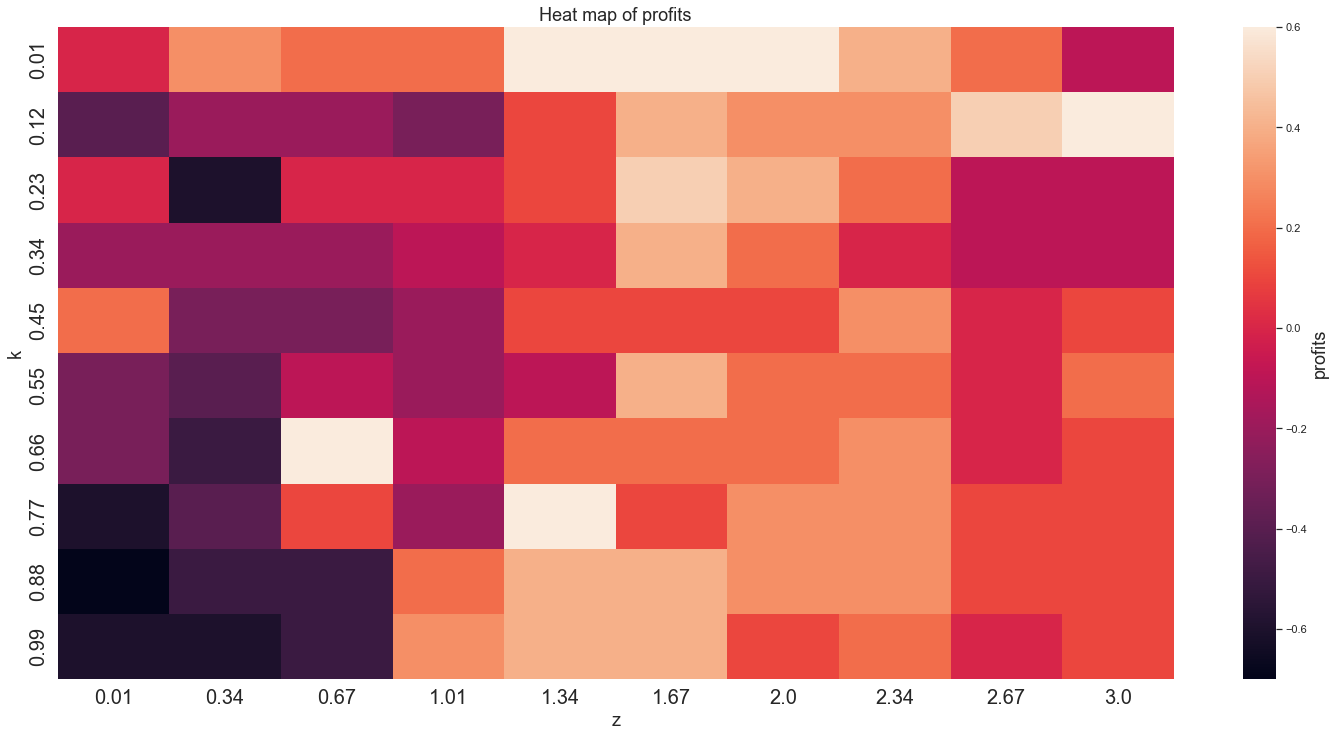

In [91]:
heatmap("k", "z","profits", storage)

Final hyperparameters are k = 0.66 and z = 0.67 and h = 5

### c.

In [92]:
# apply strategy to rest 20% of the observations 

val_df1 = val_df.copy()
val_df1["Filter"] = val_df1['S5ENRS Index  (R2)'].ewm(alpha = k, adjust = False).mean()
val_df1["Filter Error"] = val_df1['S5ENRS Index  (R2)'] -val_df1["Filter"]
val_df1["std"] = val_df1["Filter Error"].rolling(int(w)).std()
val_df1["Upper"] = val_df1["Filter"] + z*val_df1["std"]
val_df1["Lower"] = val_df1["Filter"] - z*val_df1["std"]

val_df1["test"] = np.where(val_df1["Filter Error"].abs()>z*val_df1["std"], 1, 0)*np.sign(val_df1["Filter Error"])

val_df1["test2"] = 0
val_df1["signal"] = 0
for j in val_df1.index:
    if (val_df1.loc[j, "test"] == 1) &  (val_df1.shift().loc[j, "test"] != 1):
        val_df1.loc[j:j+datetime.timedelta(h), "signal"] = 1
        val_df1.loc[j, "test2"] = 1
    elif (val_df1.loc[j, "test"] == -1) &  (val_df1.shift().loc[j, "test"] != -1):
        val_df1.loc[j:j+datetime.timedelta(h), "signal"] =  -1
        val_df1.loc[j, "test2"] = -1
val_df1["cumulative_returns"] = np.exp((val_df1["signal"].shift()*val_df1.returns).cumsum())-1
val_df1["strat_returns"] = val_df1["signal"].shift()*val_df1.returns


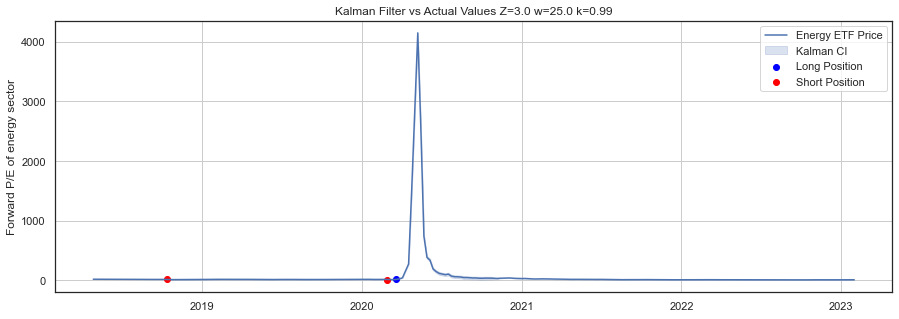

In [93]:
# visualize kalman filter 

sns.set_style("white")
fig, ax = plt.subplots(figsize = (15, 5))
ax.set_title("Kalman Filter vs Actual Values " + "Z="+str(z) + " w=" + str(w)+ " k=" + str(k))

ax.set_ylabel("Forward P/E of energy sector")
ax.plot(val_df1['S5ENRS Index  (R2)'])
#ax.plot(df_copy["Filter"])


ax.fill_between(val_df1.index, val_df1.Lower, val_df1.Upper, color='b', alpha=.2)
ax.scatter(val_df1[val_df1.test2 == 1].index, val_df1[val_df1.test2 == 1]['S5ENRS Index  (R2)'], color = "blue")
ax.scatter(val_df1[val_df1.test2 == -1].index, val_df1[val_df1.test2 == -1]['S5ENRS Index  (R2)'], color = "red")

#ax.axvline(df_copy.index[-5], color = "red", linestyle = '--')
ax.legend(["Energy ETF Price", "Kalman CI", "Long Position", "Short Position"])


#plt.xlim([datetime.date(2000, 1, 1), datetime.date(2004, 1, 1)])
ax.grid()

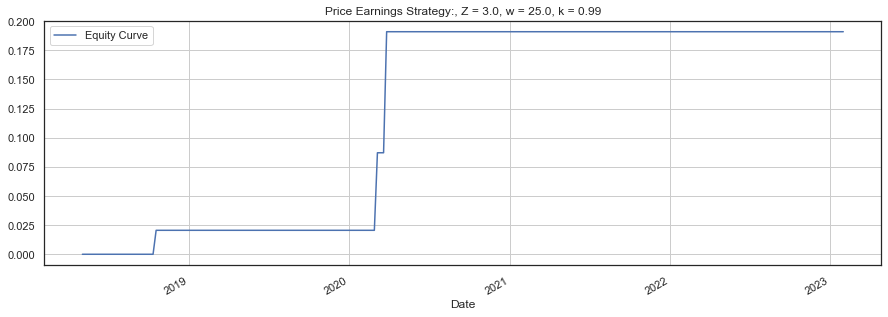

In [94]:
# visualize returns 

plt.figure(figsize = (15, 5))
(val_df1["cumulative_returns"]).plot()

plt.title("Price Earnings Strategy:"+ ", Z = "+str(z) + ", w = " + str(w)+ ", k = " + str(k))

plt.legend(["Equity Curve"])

plt.grid()

Total Rate of Return

In [95]:
total_return = val_df1["cumulative_returns"].iloc[-1]
print(total_return)

0.19089711393223618


Annualized Rate of Return

In [96]:
P = 1000000
t = len(val_df1)/12
A = (val_df1["cumulative_returns"].iloc[-1]/100+1)*P
ann_rate = (((A/P)**(1/t))-1)*100
print('annualized rate of return is', ann_rate*100, '%')

annualized rate of return is 0.9191513330919499 %


RoR over th edays we hiold a position

In [97]:
days_in_market = val_df1["signal"].ne(0).count()  # count the number of rows where the signal is not zero
print(f"Days in market: {days_in_market}")

Days in market: 249


In [98]:
val_df1['ror_in_market'] = (val_df1["cumulative_returns"].shift()/val_df1["cumulative_returns"])**(365/249)-1
val_df1['ror_in_market'].sum()

-2.5631458286736843

Sharpe Ratio

In [99]:
rf = pd.read_csv('1-year-treasury-rate-yield-chart.csv')
rf.set_index('date', inplace=True)

# convert the index to datetime
rf.index = pd.to_datetime(rf.index)
rf.tail()

,value
date,
2023-01-08,NaN
2023-01-09,NaN
2023-01-10,NaN
2023-01-11,NaN
2023-01-12,NaN


In [100]:
# merge rf database with val_df1 database 

rf_energy = pd.merge_asof(val_df1, rf,left_index = True, right_index = True)
rf_energy

,S5ENRS Index (R2),Close,returns,Filter,Filter Error,std,Upper,Lower,test,test2,signal,cumulative_returns,strat_returns,ror_in_market,value
Date,,,,,,,,,,,,,,,
2018-04-27,19.7716,73.820000,0.007069,19.771600,0.000000,NaN,NaN,NaN,0.0,0,0,NaN,NaN,NaN,2.24
2018-05-04,19.5187,73.849998,0.000406,19.521229,-0.002529,NaN,NaN,NaN,-0.0,0,0,0.000000,0.0,NaN,2.24
2018-05-11,19.7347,76.730003,0.038257,19.732565,0.002135,NaN,NaN,NaN,0.0,0,0,0.000000,0.0,NaN,2.28
2018-05-18,19.6663,78.110001,0.017825,19.666963,-0.000663,NaN,NaN,NaN,-0.0,0,0,0.000000,0.0,NaN,2.32
2018-05-25,18.4294,74.580002,-0.046246,18.441776,-0.012376,NaN,NaN,NaN,-0.0,0,0,0.000000,-0.0,NaN,2.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-06,10.1140,87.559998,0.001028,10.113164,0.000836,0.004722,10.127330,10.098998,0.0,0,0,0.190897,0.0,0.0,NaN
2023-01-13,10.5296,89.949997,0.026930,10.525436,0.004164,0.004759,10.539712,10.511160,0.0,0,0,0.190897,0.0,0.0,NaN
2023-01-20,10.6727,90.480003,0.005875,10.671227,0.001473,0.004539,10.684845,10.657610,0.0,0,0,0.190897,0.0,0.0,NaN


In [101]:
rf_energy.columns

Index(['S5ENRS Index  (R2)', 'Close', 'returns', 'Filter', 'Filter Error',
       'std', 'Upper', 'Lower', 'test', 'test2', 'signal',
       'cumulative_returns', 'strat_returns', 'ror_in_market', ' value'],
      dtype='object')

In [102]:
rf_energy["rf"] = rf_energy[' value']
rf_energy["rf"] = rf_energy["rf"].ffill()

In [103]:
# excess return 

rf_energy["excess_return"] = rf_energy['returns'] - rf_energy['rf']

In [104]:
# annualized excess return 

anualized_excess = ((rf_energy["excess_return"]+1).prod()**(12/len(rf_energy))-1)*100

In [105]:
# anualized standard deviation

excess_ann_std = rf_energy["excess_return"].std()*np.sqrt(12)*100

In [106]:
# sharpe ratio 

print('sharpe ratio is',(anualized_excess)/excess_ann_std)

sharpe ratio is 0.11310182428662408


Gini Coefficent

In [107]:
returns = val_df1[['returns']]
returns.columns = ['Returns']

In [108]:
def GINI_COEF(returns):
    # get the number of periods -> will allow us to calculate the areas
    periods = len(returns.sort_values(by="Returns")) - 1
    
    # sort values and sum to calculate the lorenz curve
    LorenzCurve = np.cumsum(returns.sort_values(by="Returns"))
    # start from 0
    LorenzCurve = pd.DataFrame({'Returns': [0]}).append(LorenzCurve)
    Line = LorenzCurve.copy()
    # Form the line that encompasses A and B
    Line["Returns"] = np.arange(0, 1 + 1 / periods, 1 / periods) * max(LorenzCurve["Returns"])
    
    # calculate the area of A+B
    UpArea = 0
    for i in range(len(returns)-1):
        UpArea += ((Line.iloc[i+1, 0] - LorenzCurve.iloc[i+1, 0] + Line.iloc[i, 0] - LorenzCurve.iloc[i, 0]) / 2)
    
    # calculate the area of A+B+C
    if min(LorenzCurve["Returns"]) < 0:
        AllArea = (np.abs(min(LorenzCurve["Returns"])) * periods) + ((max(LorenzCurve["Returns"]) * periods) / 2)
    else:
        AllArea = ((max(LorenzCurve["Returns"]) * periods) / 2)
    gini = UpArea / AllArea
    return gini



GINI_COEF(returns)


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\2230478343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  LorenzCurve = pd.DataFrame({'Returns': [0]}).append(LorenzCurve)


0.7463093832343952

## Question:2
3.5% coupon 10-year Treasury note is currently selling at $983.125
face value is $1000
Coupons for treasury notes are paid semi-annually
### a.

In [109]:
# semiannual yield to maturity (r) of this note
P = 983.125
F = 1000
c = 0.035
t = 10 
C = 17.5
n = 20


# Define the function to solve for
def f(r):
    return P - np.sum(C/(1+r/2)**i for i in range(1,n+1)) - F/(1+r/2)**n

# Define the bisection method
def bisection(a, b, f, tol=1e-6):
    while (b-a)/2 > tol:
        c = (a+b)/2
        if f(c) == 0:
            return c
        elif f(a)*f(c) < 0:
            b = c
        else:
            a = c
    return (a+b)/2

# Solve for the semi-annual yield to maturity
r = bisection(0, 1, f)
print("Semi-annual yield to maturity: {:.2%}".format(r))

Semi-annual yield to maturity: 3.70%


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\3434243794.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return P - np.sum(C/(1+r/2)**i for i in range(1,n+1)) - F/(1+r/2)**n


### b.

In [110]:
# annualized yield to maturity 

annual_yield = (1+r/2)**2 - 1
print("Annual yield to maturity: {:.2%}".format(annual_yield))


Annual yield to maturity: 3.74%


## Question:3
### a.

In [111]:
# upload database - monthly yield 

interest = pd.read_csv("Hw3_Interest_Rates.csv")

# change date to datetime and make it as index
interest['date'] = pd.to_datetime(interest['date'])

interest.set_index('date', inplace = True)
interest

,United States,Euro Area,Canada,Australia,Switzerland,United Kingdom,Japan,Norway,New Zealand,Sweden
date,,,,,,,,,,
2000-02-01,0.004875,0.002901,0.004333,0.004709,0.002012,0.004985,NaN,0.004781,0.004812,0.003193
2000-03-01,0.004978,0.003070,0.004395,0.004781,0.002349,0.004983,NaN,0.004868,0.005073,0.003322
2000-04-01,0.005088,0.003214,0.004482,0.004899,0.002663,0.005036,NaN,0.005049,0.005254,0.003266
2000-05-01,0.005427,0.003564,0.004770,0.005112,0.002596,0.005048,NaN,0.005262,0.005474,0.003242
2000-06-01,0.005442,0.003676,0.004794,0.005049,0.002787,0.004980,NaN,0.005435,0.005560,0.003225
...,...,...,...,...,...,...,...,...,...,...
2022-09-01,0.002636,0.000839,0.003106,0.002271,NaN,0.002393,-0.000017,0.002418,0.002984,0.001250
2022-10-01,0.003153,0.001182,0.003459,0.002426,NaN,0.002782,-0.000013,0.002734,0.003274,0.001324
2022-11-01,0.003643,0.001508,0.003572,0.002515,NaN,0.002887,-0.000013,0.002879,0.003466,0.001389


In [112]:
# extract yields only for Japan and US 

irs = interest[['United States', 'Canada']]
irs.fillna(0, inplace = True)

C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\1311990001.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  irs.fillna(0, inplace = True)


In [113]:
# extract exchange rate data for United States and Japan 

ex = pd.read_excel("ex_rates.xlsx")
ex['Date'] = pd.to_datetime(ex['Unnamed: 0'])
ex.set_index('Date', inplace = True)
exchange = ex[['Canada']]

In [114]:
exchange['United States'] = 1
exchange

C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\303839078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange['United States'] = 1


,Canada,United States
Date,,
2000-02-01,1.4496,1
2000-03-01,1.4494,1
2000-04-01,1.4801,1
2000-05-01,1.4965,1
2000-06-01,1.4806,1
...,...,...
2022-09-01,1.3707,1
2022-10-01,1.3649,1
2022-11-01,1.3508,1


In [115]:
# calculate the currencies with the highest and lowest yields each period
maxI = irs.idxmax(axis = 1)
minI = irs.idxmin(axis = 1)

In [116]:
irs['max yield'] = maxI
irs['min yield'] = minI
irs

C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\3411724993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  irs['max yield'] = maxI
C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\3411724993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  irs['min yield'] = minI


,United States,Canada,max yield,min yield
date,,,,
2000-02-01,0.004875,0.004333,United States,Canada
2000-03-01,0.004978,0.004395,United States,Canada
2000-04-01,0.005088,0.004482,United States,Canada
2000-05-01,0.005427,0.004770,United States,Canada
2000-06-01,0.005442,0.004794,United States,Canada
...,...,...,...,...
2022-09-01,0.002636,0.003106,Canada,United States
2022-10-01,0.003153,0.003459,Canada,United States
2022-11-01,0.003643,0.003572,United States,Canada


In [117]:
yld = pd.DataFrame([maxI, minI]).T
yld.columns = ["High Yield", "Low Yield"]
yld

,High Yield,Low Yield
date,,
2000-02-01,United States,Canada
2000-03-01,United States,Canada
2000-04-01,United States,Canada
2000-05-01,United States,Canada
2000-06-01,United States,Canada
...,...,...
2022-09-01,Canada,United States
2022-10-01,Canada,United States
2022-11-01,United States,Canada


In [118]:
# trading strategy: go short of currency with lower interest rate and go long on currency with higher interest rate 

# profits 

profits = np.array([])
for j in range(len(exchange)-1):
    
    # identify the country with the highest (long)        # identifies if US has greater yield than Canada or not 
    # and lowest (short) yield
    long = maxI[j]
    short = minI[j]
    
    # get the exchange rate at t0 and t+1
    # for the short
    sts0 = exchange[short][j]                             # shorts currency with lower yield 
    sts1 = exchange[short][j+1]
    
    # get the monthly interest rate
    # for the short
    si = irs[short][j]
    
    # calculate the amount owed
    owed = 10000*sts0*si/sts1
    
    # get the exchange rate at t0 and t+1
    # for the long
    stl0 = exchange[long][j]
    stl1 = exchange[long][j+1]
    
    # get the monthly interest rate for the long
    li = irs[long][j]
    
    # calculate the ending balance
    balance = 10000*stl0*li/stl1
    
    # calculate the profit
    profit = balance - owed
    
    # store the profits
    profits = np.append(profits, profit)
    
    print(profit)
    
    
profits = pd.DataFrame(profits, index = irs.index[:-1], columns = ["Profit"])

5.421077894553498
6.737543773026594
6.559779278525497
6.059702522100785
6.686190080858822
5.763369614317831
6.64673516262247
6.545148354461595
6.959217135125087
4.939699362779699
5.486677917624917
2.2513333285232306
1.6343207323132063
0.526040465179058
0.6358161004577383
3.937801348761802
4.947707723536382
5.008451039521432
4.168120146660655
4.816661648930086
4.682387615570402
1.5650517082746234
2.413849444139057
2.1894236363269197
2.5618379641419704
2.959974313969706
4.814479216844314
6.603345663810151
6.933558783122026
9.177033685591509
9.479595507481516
9.735749523041065
9.287942541708812
11.606859181616588
13.295301869523964
13.533960061058599
13.756432928342592
16.721475439625493
18.22101413056736
17.56887778655862
16.721569651849954
16.376688644012496
15.15300836711782
13.964601174114144
13.290534133379692
13.658155677466755
12.630708039230116
11.599160357941887
10.736996401888957
8.310610360924743
8.262337178904492
7.480486401007164
5.336657661710488
4.6235834328043115
4.4656979

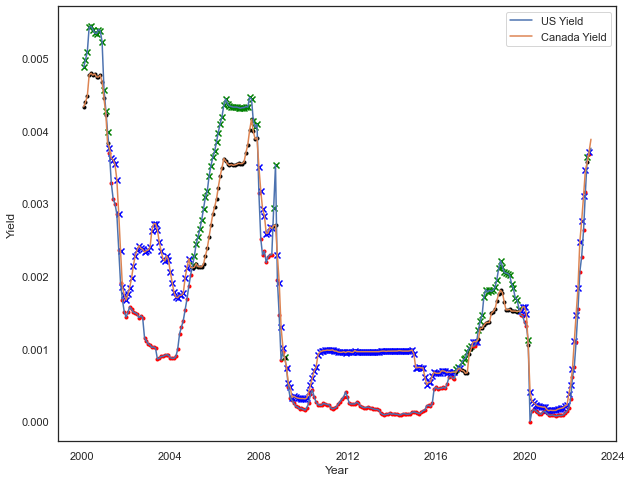

In [119]:
# trying to visualize the trading strategy 

import matplotlib.pyplot as plt

# Plot the yields of US and Canada
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(irs["United States"], label='US Yield')
ax.plot(irs['Canada'], label='Canada Yield')

# Add trading signals as dots and 'x'
for j in range(len(profits)):
    if maxI[j] == "United States":
        ax.scatter(irs.index[j], irs.iloc[j]["United States"], color='green', marker='x')
    elif minI[j] == "United States":
        ax.scatter(irs.index[j], irs.iloc[j]["United States"], color='red', marker='.')
    if maxI[j] == "Canada":
        ax.scatter(irs.index[j], irs.iloc[j]["Canada"], color='blue', marker='x')
    elif minI[j] == "Canada":
        ax.scatter(irs.index[j], irs.iloc[j]["Canada"], color='black', marker='.')
    
# Set plot labels and legend
ax.set_ylabel('Yield')
ax.set_xlabel('Year')
ax.legend()
plt.show()


In [120]:
# yearly profits 
year_profit = profits.Profit.resample('Y').sum()
year_profit = pd.DataFrame(year_profit)
year_profit.head()

,Profit
date,
2000-12-31,67.805141
2001-12-31,36.587541
2002-12-31,88.645102
2003-12-31,181.597026
2004-12-31,74.696160


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\3299341746.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cp = profits.resample('Y').sum().cumsum().append(pd.DataFrame(0, index = [pd.to_datetime("12/31/1999")], columns = ['Profit'])).sort_index()


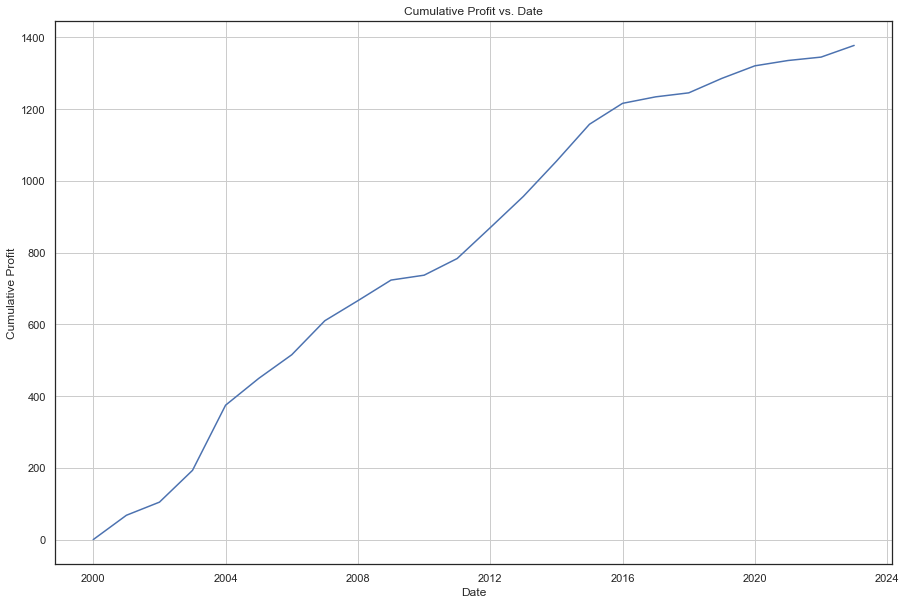

In [121]:
# equity curve without reinvestment 

cp = profits.resample('Y').sum().cumsum().append(pd.DataFrame(0, index = [pd.to_datetime("12/31/1999")], columns = ['Profit'])).sort_index()
plt.figure(figsize = (15, 10))
plt.title('Cumulative Profit vs. Date')
plt.plot(cp)
plt.ylabel('Cumulative Profit')
plt.xlabel('Date')

plt.grid()

Total Rate of Return

In [122]:
tror = (profits.Profit.resample('Y').sum()/10000)*100
print('total rate of return', tror)

total rate of return date
2000-12-31    0.678051
2001-12-31    0.365875
2002-12-31    0.886451
2003-12-31    1.815970
2004-12-31    0.746962
2005-12-31    0.660168
2006-12-31    0.947868
2007-12-31    0.558681
2008-12-31    0.574497
2009-12-31    0.136027
2010-12-31    0.464515
2011-12-31    0.860125
2012-12-31    0.872129
2013-12-31    0.981036
2014-12-31    1.030178
2015-12-31    0.582829
2016-12-31    0.181215
2017-12-31    0.111248
2018-12-31    0.402984
2019-12-31    0.350268
2020-12-31    0.148329
2021-12-31    0.095004
2022-12-31    0.325876
Freq: A-DEC, Name: Profit, dtype: float64


Annualized Return

In [123]:
t = len(tror)
ann_re = ((((tror/100)+1).cumprod()[-1])**(1/t)-1)
ann_re

0.005982091621892005

Alpha and Beta


In [124]:
# for this we need market rate of return and we need risk free rate 

In [125]:
# get market returns 

import yfinance as yf

# Download data for the S&P 500 index
spy = yf.Ticker("^GSPC")
snp = spy.history(period="max")

# Select only the closing price column
snp_close = snp[["Close"]]

snp_close.index = pd.to_datetime(snp_close.index)
snp_close

# convert closing price to returns 
snp_close = snp_close.pct_change()

# get yearly data 

snp_yearly = snp_close.resample('Y').mean()
snp_yearly.dropna()

,Close
Date,
1928-12-31 00:00:00-05:00,0.001329
1929-12-31 00:00:00-05:00,-0.000230
1930-12-31 00:00:00-05:00,-0.001181
1931-12-31 00:00:00-05:00,-0.002183
1932-12-31 00:00:00-05:00,-0.000077
...,...
2019-12-31 00:00:00-05:00,0.001038
2020-12-31 00:00:00-05:00,0.000832
2021-12-31 00:00:00-05:00,0.000980


In [126]:
# get risk free rate 

rf1 = rf.copy()

# convert into annual data 

rf1.resample('Y').mean()
rf1

,value
date,
1962-01-02,3.22
1962-01-03,3.24
1962-01-04,3.24
1962-01-05,3.26
1962-01-08,3.31
...,...
2023-01-08,NaN
2023-01-09,NaN
2023-01-10,NaN


In [127]:
# merge all datasets 

# merge market free interest rate with market return 

snp_rf = pd.merge_asof(snp_yearly, rf1, left_index = True, right_index = True)
snp_rf.dropna()

,Close,value
Date,,
1962-12-31 00:00:00-05:00,-0.000444,3.0500
1963-12-31 00:00:00-05:00,0.000704,3.8300
1964-12-31 00:00:00-05:00,0.000488,3.9900
1965-12-31 00:00:00-05:00,0.000354,4.9600
1966-12-31 00:00:00-05:00,-0.000529,5.0000
1967-12-31 00:00:00-05:00,0.000744,5.7600
1968-12-31 00:00:00-05:00,0.000344,6.4600
1969-12-31 00:00:00-05:00,-0.000462,8.3200
1970-12-31 00:00:00-05:00,0.000049,4.9400


In [128]:
# merge above dataset with tror dataset

final = pd.merge_asof(snp_rf, tror, left_index = True, right_index = True)
final.dropna()

,Close,value,Profit
Date,,,
2000-12-31 00:00:00-05:00,-0.000327,5.3200,0.678051
2001-12-31 00:00:00-05:00,-0.000472,2.1700,0.365875
2002-12-31 00:00:00-05:00,-0.000922,1.3200,0.886451
2003-12-31 00:00:00-05:00,0.000987,1.2600,1.815970
2004-12-31 00:00:00-05:00,0.000366,2.7500,0.746962
2005-12-31 00:00:00-05:00,0.000138,4.3800,0.660168
2006-12-31 00:00:00-05:00,0.000529,5.0000,0.947868
2007-12-31 00:00:00-05:00,0.000189,3.3400,0.558681
2008-12-31 00:00:00-05:00,-0.001587,0.3700,0.574497


In [129]:
# now calculate excess market return 
final['excess market return'] = final['Close'] - final[' value']
final.dropna()

,Close,value,Profit,excess market return
Date,,,,
2000-12-31 00:00:00-05:00,-0.000327,5.3200,0.678051,-5.320327
2001-12-31 00:00:00-05:00,-0.000472,2.1700,0.365875,-2.170472
2002-12-31 00:00:00-05:00,-0.000922,1.3200,0.886451,-1.320922
2003-12-31 00:00:00-05:00,0.000987,1.2600,1.815970,-1.259013
2004-12-31 00:00:00-05:00,0.000366,2.7500,0.746962,-2.749634
2005-12-31 00:00:00-05:00,0.000138,4.3800,0.660168,-4.379862
2006-12-31 00:00:00-05:00,0.000529,5.0000,0.947868,-4.999471
2007-12-31 00:00:00-05:00,0.000189,3.3400,0.558681,-3.339811
2008-12-31 00:00:00-05:00,-0.001587,0.3700,0.574497,-0.371587


In [130]:
import statsmodels.api as sm


In [131]:
# run regression 


X = sm.add_constant(final['excess market return']).dropna()
y = final['Profit'].dropna()

X_Y = pd.merge_asof(X, y, left_index=True, right_index=True, direction='nearest').dropna()

x_y = X_Y[['const', 'excess market return']]

model = sm.OLS(X_Y['Profit'], x_y).fit()
alpha, beta = model.params

print("Alpha: ", alpha)
print("Beta: ", beta)


Alpha:  0.6101718512242316
Beta:  -0.008946519843041453


Sharpe Ratio

In [132]:
# get excess return 

final['excess return'] = final['Profit'] - final[' value']

In [133]:
# get standard deviation 

avg_return = np.mean(final['excess return'])
volatility = np.std(final['excess return'])

# Assume you have the risk-free rate stored in a variable called rf_rate
sharpe_ratio = (avg_return) / volatility

print("Sharpe Ratio: ", sharpe_ratio)

Sharpe Ratio:  -0.6101811978724458


Gini Coefficent

In [134]:
def GINI_COEF(returns):
    # get the number of periods -> will allow us to calculate the areas
    periods = len(returns)
    
    # sort values and sum to calculate the lorenz curve
    LorenzCurve = np.cumsum(returns.sort_values(by="Returns"))
    # start from 0
    LorenzCurve = pd.DataFrame({'Returns': [0]}).append(LorenzCurve)
    Line = LorenzCurve.copy()
    # Form the line that encompasses A and B
    Line["Returns"] = np.arange(0, 1 + 1 / periods, 1 / periods) * max(LorenzCurve["Returns"])
    
    # calculate the area of A+B
    UpArea = 0
    for i in range(1, len(returns)):
        if not np.isnan(LorenzCurve.iloc[i, 0]):
            UpArea += ((Line.iloc[i, 0] - LorenzCurve.iloc[i, 0] + Line.iloc[i - 1, 0] - LorenzCurve.iloc[i - 1, 0]) / 2)
    # calculate the area of A+B+C
    if min(LorenzCurve["Returns"]) < 0:
        AllArea = (np.abs(min(LorenzCurve["Returns"])) * periods) + ((max(LorenzCurve["Returns"]) * periods) / 2)
    else:
        AllArea = ((max(LorenzCurve["Returns"]) * periods) / 2)
    gini = UpArea / AllArea
    return gini

returns = final[['Profit']]
returns.columns = ['Returns']

GINI_COEF(returns)


C:\Users\sebpo\AppData\Local\Temp\ipykernel_24280\3765746689.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  LorenzCurve = pd.DataFrame({'Returns': [0]}).append(LorenzCurve)


-0.09884817577093283

## Question:4
### a.

The author explains that while the Fed is raising rates, it is also cautious about the future of inflation and employment, and so it may not make any drastic moves yet. However, the author also suggests that there is a risk that investors may start to disregard the Fed's statements about rate hikes, as they may believe that the Fed is only talking tough without intending to follow through. This could lead to confusion and uncertainty in the markets, which could ultimately harm the economy.

### b.

If the investors call bluff on the Fed's decison to hike rates, they might initiate a sell-off which can worsen the crisis and which can crash stock prices. On the other hand, if they feel that the Fed is trying to ameliorate the inflation, it can lead to investor confidence as the acctions will restore sepding power and can strengthen the stock market

## Question:5

Maybe, investors beleive that threats to earnings have receded, and a higher PE ratio would be justified and thus are optimistic about future economic growht and are investing due to future expectations. Especially with respect to tech stocks, which show great potential in terms of growth. Maybe, the effects of bond yields can actually be overlooked. One reason could also be the prevalance of AI which could very well mean that we are at the precipice of another tech boom and an economic boom, which could signify the positive outlook of stocks. 